<a href="https://colab.research.google.com/github/nns0212/BTechProjects/blob/main/FootBall_Pose_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install opencv-python mediapipe numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


Knee Angle: 163
Posture looks good!


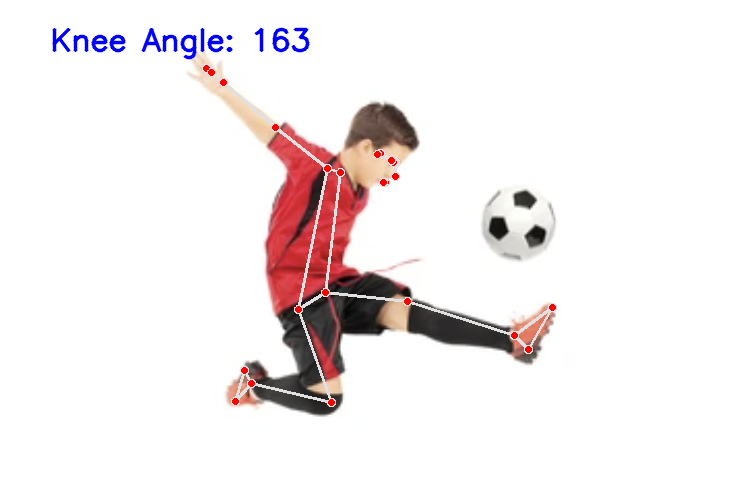

In [17]:
import cv2
import mediapipe as mp
import numpy as np

def calculate_angle(a, b, c):
    """Calculate angle between three points."""
    a = np.array(a)  # First point
    b = np.array(b)  # Mid point
    c = np.array(c)  # End point

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

# Load image (change the path to the football player's image)
image_path = "/content/Screenshot 2025-04-01 222314.png"  # Example path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pose.process(image_rgb)

if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark

    # Get coordinates for knee angle calculation
    left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
    left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                 landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
    left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                  landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

    # Calculate knee angle
    knee_angle = calculate_angle(left_hip, left_knee, left_ankle)

    # Print the knee angle
    print(f'Knee Angle: {int(knee_angle)}')

    # Analyze knee collapse or incorrect posture (too small of an angle)
    if knee_angle < 90:
        feedback = "Warning: Knee collapse detected, check posture."
    else:
        feedback = "Posture looks good!"

    # Print the feedback
    print(feedback)

    # You can remove these lines as we're not displaying the image anymore
    cv2.putText(image, f'Knee Angle: {int(knee_angle)}', (50, 50),
    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Remove image display
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Knee Angle: 145
Posture looks good!


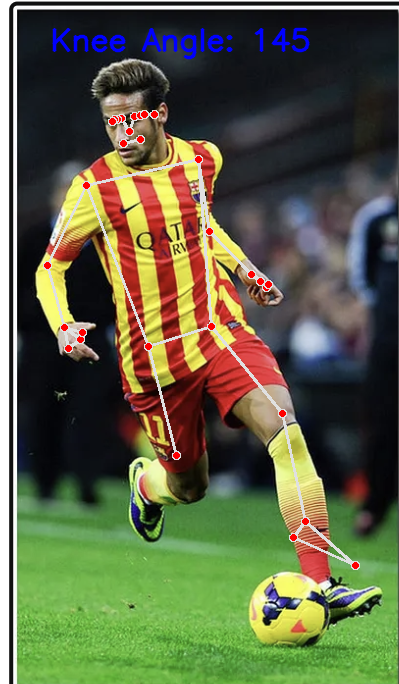

In [18]:
import cv2
import mediapipe as mp
import numpy as np

def calculate_angle(a, b, c):
    """Calculate angle between three points."""
    a = np.array(a)  # First point
    b = np.array(b)  # Mid point
    c = np.array(c)  # End point

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

# Load image (change the path to the football player's image)
image_path = "/content/Screenshot 2025-04-01 220929.png"  # Example path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pose.process(image_rgb)

if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark

    # Get coordinates for knee angle calculation
    left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
    left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                 landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
    left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                  landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

    # Calculate knee angle
    knee_angle = calculate_angle(left_hip, left_knee, left_ankle)

    # Print the knee angle
    print(f'Knee Angle: {int(knee_angle)}')

    # Analyze knee collapse or incorrect posture (too small of an angle)
    if knee_angle < 90:
        feedback = "Warning: Knee collapse detected, check posture."
    else:
        feedback = "Posture looks good!"

    # Print the feedback
    print(feedback)

    # You can remove these lines as we're not displaying the image anymore
    cv2.putText(image, f'Knee Angle: {int(knee_angle)}', (50, 50),
    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Remove image display
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()